### Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MaxAbsScaler
import category_encoders as ce
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA 

### Read Data

In [109]:
path = '/home/huzaifa/Downloads/T_UAE training/ML2/Anime_Recommendation_System/Data/'
 
try:
    train_df = pd.read_csv(path+'train.csv')
    anime = pd.read_csv(path+'anime.csv')
    sub = pd.read_csv(path+'sample.csv')
    print('Read Data from {} is Done \U0001f600'.format('train.csv, anime.csv, and sample.csv'))
    print('The shape of Train: ', train_df.shape)
    print('The shape of Anime: ', anime.shape)
except Exception:
    print('Can\'t read Data ..! \U0001F923')

Read Data from train.csv, anime.csv, rating_complete.csv and sample.csv is Done 😀
The shape of Train:  (1515300, 6)
The shape of Anime:  (17562, 35)
The shape of Rating_Complete:  (57633278, 3)


In [110]:
print('Train DF Data: ')
display(train_df.head())
print('Anime Data: ')
display(anime.head())
print('Rating_Complete Data: ')
display(r_comp.head())

Train DF Data: 


,Unnamed: 0,user_id,anime_id,rating,watching_status,watched_episodes
0,0,20807,4282,10,2,1
1,1,20807,5665,0,6,0
2,2,20807,36127,0,6,0
3,3,20807,38163,0,6,0
4,4,20807,1284,0,6,0


Anime Data: 


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


Rating_Complete Data: 


,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


### Data Analysis

In [111]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [112]:
train_df['anime_id'].nunique()

15898

In [113]:
train_df['user_id'].nunique()

15153

In [114]:
# fig, ax = plt.subplots(5,2, figsize=(15,17))
# for count1, value in enumerate(['Age', 'Region_Code', 'Policy_Sales_Channel', 'Annual_Premium', 'Vintage']):
#     # visulaize box plot
#     sns.boxplot(data=data, x=data[value], ax=ax[count1, 0])
#     ax[count1, 0].set_ylabel(str(value))
#     ax[count1, 0].grid()
#     # visulaize histogram plot
#     bins = len(data[value].unique())//2
#     sns.histplot(data=data, x=data[value], bins=20, kde=True, ax=ax[count1, 1])
# plt.savefig('Images/Numerical_Features.jpeg')

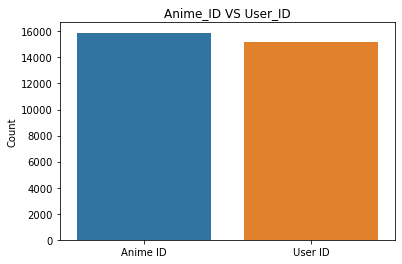

In [115]:
plt.title('Anime_ID VS User_ID')
plt.ylabel('Count')
sns.barplot(x=['Anime ID', 'User ID'], y=[15898, 15153])
plt.savefig('Images/AnimevsUser.jpeg')

In [116]:
temp = train_df[['user_id', 'anime_id']].groupby(['user_id']).count()
temp.head()

,anime_id
user_id,
17,100
42,100
60,100
111,100
121,100


In [117]:
train_df.rename(columns={'anime_id': 'MAL_ID'}, inplace=True)

In [118]:
train_df[train_df['watching_status']== 3]

,Unnamed: 0,user_id,MAL_ID,rating,watching_status,watched_episodes
407,407,297931,17729,0,3,0
422,422,297931,4975,0,3,0
439,439,297931,34382,0,3,0
449,449,297931,2780,0,3,0
452,452,297931,33834,0,3,0
...,...,...,...,...,...,...
1515246,1515246,256792,1288,0,3,2
1515255,1515255,256792,19367,0,3,0
1515269,1515269,256792,3613,0,3,5
1515279,1515279,256792,23755,0,3,10


In [119]:
tep = train_df[train_df['watching_status']==3][['user_id', 'watching_status']]
temp = tep.groupby(['user_id']).count()
temp

,watching_status
user_id,
17,1
42,1
60,2
111,1
121,2
...,...
353292,3
353302,8
353311,6


In [120]:
train_df.isnull().sum()

Unnamed: 0          0
user_id             0
MAL_ID              0
rating              0
watching_status     0
watched_episodes    0
dtype: int64

In [121]:
print('Describe Train DF:')
train_df.describe().T

Describe Train DF:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1515300.0,757649.500000,437429.575790,0.0,378824.75,757649.5,1136474.25,1515299.0
user_id,1515300.0,176814.425592,101875.805875,17.0,88274.00,176377.0,265817.00,353395.0
MAL_ID,1515300.0,17219.883488,13956.074686,1.0,3655.00,13759.0,31706.00,48492.0
rating,1515300.0,3.907696,3.793444,0.0,0.00,5.0,7.00,10.0
watching_status,1515300.0,3.185147,1.853994,0.0,2.00,2.0,6.00,6.0
watched_episodes,1515300.0,8.952423,39.662433,0.0,0.00,1.0,12.00,12799.0


In [122]:
train_df['watching_status'].unique()

array([2, 6, 1, 3, 0])

In [123]:
# anime = pd.merge(train_df, anime, on='MAL_ID')

In [124]:
# anime.head()

In [125]:
print('Describe Object features: ')
display(anime.describe(include='O').T)
print('\nDescribe numerical features: ')
display(anime.describe().T)

Describe Object features: 


,count,unique,top,freq
Name,17562,17558,Maou Gakuin no Futekigousha: Shijou Saikyou no...,3
Score,17562,533,Unknown,5141
Genres,17562,5034,Hentai,969
English name,17562,6831,Unknown,10565
Japanese name,17562,16679,Unknown,48
Type,17562,7,TV,4996
Episodes,17562,201,1,8381
Aired,17562,11947,Unknown,309
Premiered,17562,231,Unknown,12817
Producers,17562,3783,Unknown,7794



Describe numerical features: 


,count,mean,std,min,25%,50%,75%,max
MAL_ID,17562.0,21477.192347,14900.093170,1.0,5953.5,22820.0,35624.75,48492.0
Popularity,17562.0,8763.452340,5059.327278,0.0,4383.5,8762.5,13145.00,17565.0
Members,17562.0,34658.539517,125282.141428,1.0,336.0,2065.0,13223.25,2589552.0
Favorites,17562.0,457.746270,4063.473313,0.0,0.0,3.0,31.00,183914.0
Watching,17562.0,2231.487758,14046.688133,0.0,13.0,73.0,522.00,887333.0
Completed,17562.0,22095.571347,91009.188504,0.0,111.0,817.5,6478.00,2182587.0
On-Hold,17562.0,955.049653,4275.675096,0.0,6.0,45.0,291.75,187919.0
Dropped,17562.0,1176.599533,4740.348653,0.0,37.0,77.0,271.00,174710.0
Plan to Watch,17562.0,8199.831227,23777.691963,1.0,112.0,752.5,4135.50,425531.0


In [126]:
print('Info features: ')
display(anime.info())

Info features: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members   

None

In [127]:
anime['Ranked'].nunique()

10490

In [128]:
anime['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown'],
      dtype=object)

In [129]:
anime['Rating'].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

/home/huzaifa/anaconda3/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


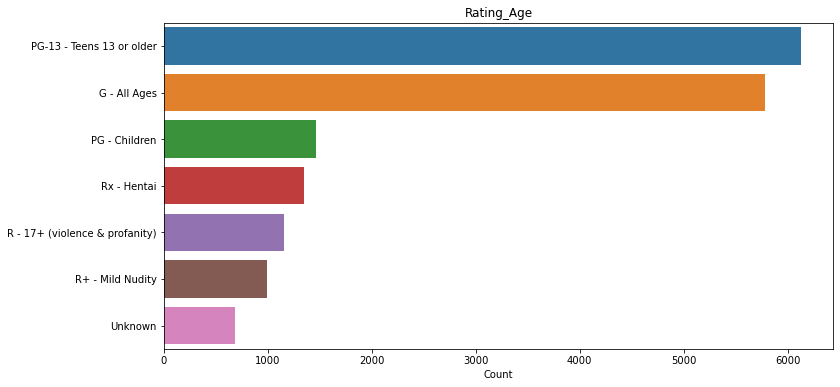

In [130]:
temp = anime['Rating'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
# .plot(kind='barh', color='pink')
plt.title('Rating_Age')
plt.xlabel('Count')
# plt.barh(temp.index.values, temp.values)
sns.barplot(temp.values, temp.index.values)
plt.savefig('Images/rating_age.jpeg')

/home/huzaifa/anaconda3/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


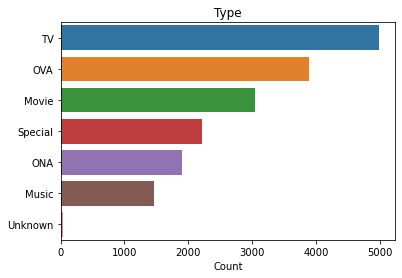

In [131]:
temp = anime['Type'].value_counts().sort_values(ascending=False)
plt.title('Type')
plt.xlabel('Count')
sns.barplot(temp.values, temp.index.values)
plt.savefig('Images/type.jpeg')

/home/huzaifa/anaconda3/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


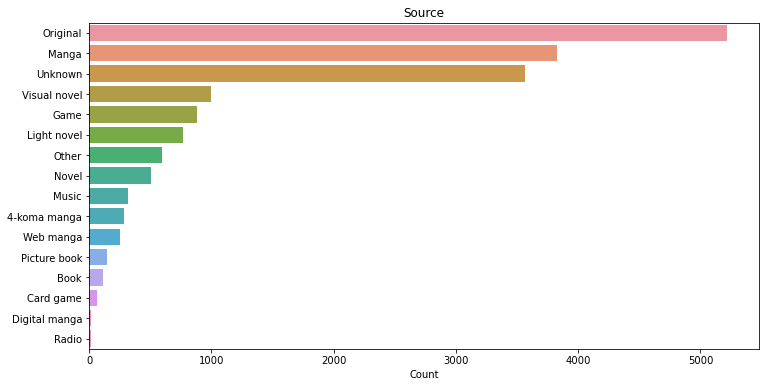

In [132]:
temp = anime['Source'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Source')
plt.xlabel('Count')
sns.barplot(temp.values, temp.index.values)
plt.savefig('Images/source.jpeg')

/home/huzaifa/anaconda3/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


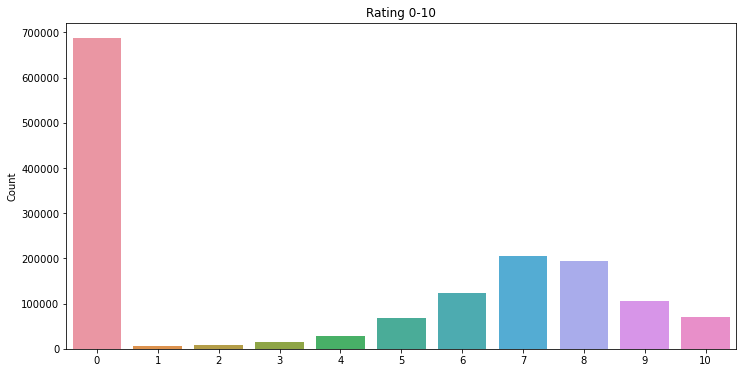

In [133]:
temp = train_df['rating'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Rating 0-10')
plt.ylabel('Count')
sns.barplot(temp.index.values, temp.values)
plt.savefig('Images/rating.jpeg')

/home/huzaifa/anaconda3/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


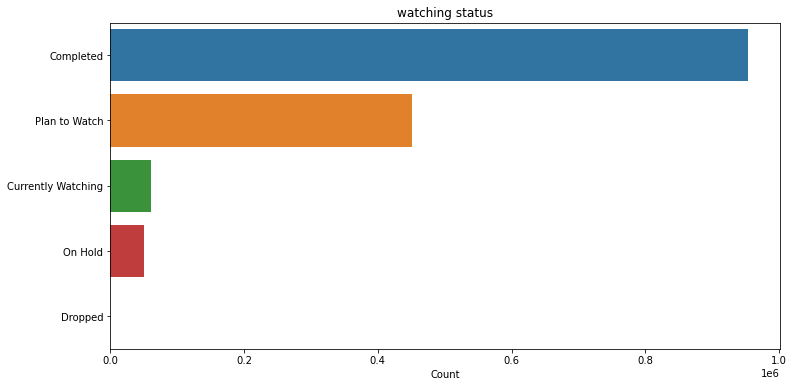

In [134]:
temp = train_df['watching_status'].value_counts()
tep = ['Completed', 'Plan to Watch', 'Currently Watching', 'On Hold', 'Dropped']
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('watching status')
plt.xlabel('Count')
sns.barplot(temp.values, tep)
plt.savefig('Images/watching_status.jpeg')

### Pre-processing

In [28]:
for col in anime.columns.to_list():
    anime[str(col)].replace('Unknown', np.nan, inplace=True)

In [29]:
for score in range(1, 11):
    anime['Score-'+str(score)] = anime['Score-'+str(score)].astype(float)
anime['Ranked'] = anime['Ranked'].astype(float)
anime['Episodes'] = anime['Episodes'].astype(float)
anime['Score'] = anime['Score'].astype(float)

In [30]:
temp = pd.DataFrame(anime.isnull().sum().sort_values(ascending=False), columns=['missing_count'])
temp = temp[temp['missing_count']>0]

/home/huzaifa/anaconda3/envs/tf2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


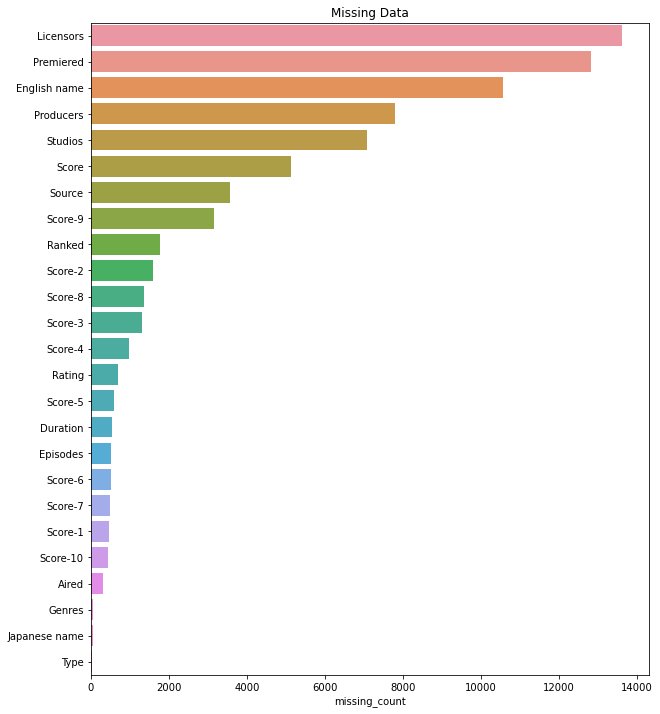

In [31]:
fig, ax = plt.subplots(figsize=(10,12))
plt.title('Missing Data')
# plt.barh(temp.index.values, temp['missing_count'])
sns.barplot(temp['missing_count'], temp.index.values)
plt.savefig('Images/miss.jpeg')

In [32]:
anime.drop(['Licensors', 'Premiered', 'English name', 'Producers', 'Studios', 'Aired', 'Japanese name'], axis=1, inplace=True)

In [33]:
# anime['Producers'].fillna('Unknown', inplace=True)
# anime['Studios'].fillna('Unknown', inplace=True)
anime['Source'].fillna('Unknown', inplace=True)
anime['Duration'].fillna('Unknown', inplace=True)

In [34]:
anime['Score'].fillna(anime['Score'].mean(), inplace=True)

In [35]:
temp_df = anime[['Score', 'Ranked']].dropna()
corr = temp_df.corr()
print(corr)
# y = B0 + B1*x
fill_miss = LinearRegression()
fill_miss.fit(temp_df['Score'].values.reshape(-1, 1), temp_df['Ranked'].values.reshape(-1, 1))
B1, B0 = fill_miss.coef_[0][0], fill_miss.intercept_[0]
print('Intercept = {} , Coefficient = {}'.format(B0, B1))
for i in range(len(anime['Ranked'])):
    if pd.isnull(anime.loc[i, 'Ranked']):
        anime.loc[i, 'Ranked'] = B0 + (anime.loc[i, 'Score']*B1)

           Score    Ranked
Score   1.000000 -0.591879
Ranked -0.591879  1.000000
Intercept = 31292.492586404856 , Coefficient = -3576.7445379021674


In [36]:
for score in range(1, 11):
    anime['Score-'+str(score)].fillna(anime['Score-'+str(score)].mean(), inplace=True)

In [37]:
anime = anime[(anime['Genres'].notnull()) & (anime['Type'].notnull())]

In [38]:
anime['Rating'].fillna(anime['Rating'].mode()[0], inplace=True)

In [39]:
anime.loc[(anime['Genres']=='Hentai') & (anime['Episodes'].isnull()),'Episodes'] = 1
anime.loc[(anime['Type']=='OVA') & (anime['Episodes'].isnull()),'Episodes'] = 2

anime.loc[(anime['Type'] == 'Movie') & (anime['Episodes'] .isnull())] = 1

In [40]:
known_animes = { 'Detective Conan': 1048,
                'One Piece': 1015,
                'Boruto: Naruto Next Generations': 247}
for k,v in known_animes.items():    
    anime.loc[anime['Name']==k,'Episodes'] = v

In [41]:
anime['Episodes'].fillna(anime['Episodes'].median(),inplace = True)

In [42]:
anime[anime['Episodes']==1015]['Duration']

11    24 min.
Name: Duration, dtype: object

In [43]:
def full_time(string, ep):
    duration = 0
    string = str(string)
    if string != 'Unknown':
        string = string.split(' ')
        if 'hr.' in string:
            ind = string.index('hr.') -1
            duration+=(int(string[ind])*3600)
        if 'min.' in string:
            ind = string.index('min.') -1
            duration+=(int(string[ind])*60)
        if 'sec.' in string:
            ind = string.index('sec.') -1
            duration+=int(string[ind])
        if 'per' in string:
            return duration*ep
        else:
            return duration
    else:
        return np.nan
def time_per_ep(string, ep):
    duration = 0
    string = str(string) 
    if string != 'Unknown':
        string = string.split(' ')
        if 'hr.' in string:
            ind = string.index('hr.') -1
            duration+=(int(string[ind])*3600)
        if 'min.' in string:
            ind = string.index('min.') -1
            duration+=(int(string[ind])*60)
        if 'sec.' in string:
            ind = string.index('sec.') -1
            duration+=int(string[ind])
        if 'per' in string:
            return duration
        else:
            return int(duration/ep)
    else:
        return np.nan

In [44]:
anime['Episodes'] = anime['Episodes'].astype(int)
anime['FullDuration_in_sec'] = anime.apply(lambda x: full_time(x['Duration'], x['Episodes']), axis=1)
anime['DurationPerEp_in_sec'] = anime.apply(lambda x: time_per_ep(x['Duration'], x['Episodes']), axis=1)
anime.drop('Duration', axis=1, inplace=True)

In [45]:
anime = anime[anime['FullDuration_in_sec']!=0]

In [46]:
temp = anime[['Type', 'FullDuration_in_sec', 'DurationPerEp_in_sec']].groupby(['Type']).median()
temp

,FullDuration_in_sec,DurationPerEp_in_sec
Type,,
Movie,3300.0,3240.0
Music,180.0,180.0
ONA,720.0,240.0
OVA,2760.0,1680.0
Special,1260.0,600.0
TV,18720.0,1380.0


In [47]:
for col in ['FullDuration_in_sec', 'DurationPerEp_in_sec']:
    for ty in temp.index.to_list():
        anime.loc[(anime['Type']==str(ty)) & (anime[col].isnull()), col] = temp[col].loc[ty]

In [48]:
anime.select_dtypes('O').columns

Index(['Name', 'Genres', 'Type', 'Source', 'Rating'], dtype='object')

In [49]:
f_plot = ['Score',
 'Score-1',
 'Score-2',
 'Score-3',
 'Score-4',
 'Score-5',
 'Score-6',
 'Score-7',
 'Score-8',
 'Score-9',
 'Score-10']

s_plot = ['Completed',
 'Popularity',
 'Favorites',
 'DurationPerEp_in_sec',
         'Plan to Watch',
         'FullDuration_in_sec',
         'Watching',
         'Dropped',
         'Episodes',
         'On-Hold',
         'Ranked',
 'Members']
features = ['Popularity', 'DurationPerEp_in_sec', 'Ranked', 'Score', 'Genres', 'Type', 'Source', 'Rating']

In [50]:
# fig, ax = plt.subplots(15,2, figsize=(11,19))
# for count1, value in enumerate(s_plot):
#     # visulaize box plot
#     sns.boxplot(data=anime, x=anime[value], ax=ax[count1, 0])
#     ax[count1, 0].set_ylabel(str(value))
#     ax[count1, 0].grid()
#     # visulaize histogram plot
#     bins = len(anime[value].unique())//2
#     sns.histplot(data=anime, x=anime[value], bins=20, kde=True, ax=ax[count1, 1])
# plt.savefig('Images/Numerical_Features.jpeg')

In [51]:
# anime[anime['Name']=='']
# anime = anime[features]

In [52]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'Type', 'Episodes', 'Source',
       'Rating', 'Ranked', 'Popularity', 'Members', 'Favorites', 'Watching',
       'Completed', 'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10',
       'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4',
       'Score-3', 'Score-2', 'Score-1', 'FullDuration_in_sec',
       'DurationPerEp_in_sec'],
      dtype='object')

In [53]:
anime.reset_index(drop=True, inplace=True)

In [54]:
anime.shape

(17460, 29)

### Encoding

In [55]:
object_features = ['Genres', 'Type', 'Source']

encoder= ce.OrdinalEncoder(cols=['Rating'],return_df=True,
                        mapping=[{'col':'Rating',
                                  'mapping':{'R - 17+ (violence & profanity)': 3, 'PG-13 - Teens 13 or older': 2,
                                             'PG - Children': 1, 'R+ - Mild Nudity': 4, 'G - All Ages': 0, 'Rx - Hentai': 5}}])
anime['Rating'] = encoder.fit_transform(anime['Rating'])

In [56]:
train = pd.concat([anime["Genres"].str.get_dummies(sep=","), pd.get_dummies(anime[["Type"]]),
                   pd.get_dummies(anime[["Source"]]), anime[['Popularity', 'DurationPerEp_in_sec', 'Ranked', 'Score']]], axis=1)
                   # [['Episodes','Rating','Ranked','Popularity',
                   #                                           'Members','Favorites','Watching','Completed','On-Hold',
                   #                                           'Dropped','Plan to Watch','Score-10','Score-9',
                   #                                           'Score-8','Score-7','Score-6','Score-5','Score-4',
                   #                                           'Score-3','Score-2','Score-1','FullDuration_in_sec','DurationPerEp_in_sec']]], axis=1)
# 'watching_status', 'watched_episodes', 'rating', 'Score',

In [57]:
train.head()
# reset_index(drop=True)

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Source_Other,Source_Picture book,Source_Radio,Source_Unknown,Source_Visual novel,Source_Web manga,Popularity,DurationPerEp_in_sec,Ranked,Score
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,39,1440.0,28.0,8.78
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,518,6900.0,159.0,8.39
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,201,1440.0,266.0,8.24
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1467,1500.0,2481.0,7.27
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,4369,1380.0,3710.0,6.98


In [58]:
train.shape

(17460, 109)

### Scaling

In [59]:
scaler = MaxAbsScaler()
train = scaler.fit_transform(train)

In [60]:
pca = PCA(n_components=20, random_state=0)
train = pca.fit_transform(train)

### Modeling

In [61]:
knn = NearestNeighbors(n_neighbors=6, algorithm='auto').fit(train)
distances, indices = knn.kneighbors(train)

In [62]:
def get_index_from_name(name):
    return {'index': int(anime[anime["Name"]==name].index.tolist()[0]), 'ID':int(anime[anime["Name"]==name]['MAL_ID'].values[0])}

def get_NAMEandID_from_index(index):
    return {'Name': anime['Name'].iloc[index], 'ID': anime['MAL_ID'].iloc[index]}

def get_index_from_ID(id):
    return anime[anime['MAL_ID'] == id].index.tolist()[0]
def Anime_ID(lst):
    IDs = []
    for ind in lst:
        IDs.append(anime['MAL_ID'].iloc[ind])
    return IDs

def Result(query=None,ind=None):
    lst = Anime_ID(indices[ind][1:])
    if ind:
        print('The Name of Animes: ')
        for ID in lst:
            print('\t', anime[anime['MAL_ID']==ID]['Name'].values[0])
        print('=================================')
        print('The Indeces of Animes: ')
        print(*indices[ind][1:], sep=', ')
        print('=================================')
        print('The ID of Animes: ')
        print(*lst, sep=', ')
        print('=================================')
        print('The Distances of the Anime:')
        print(*distances[ind][1:], sep=', ')
        print('=================================')
        print('The AVG of distances = {}'.format(sum(distances[ind][1:])/len(distances[ind][1:])))
    if query:
        ind = get_index_from_name(query)
        lst = Anime_ID(indices[ind['index']][1:])
        print('The Name of Animes: ')
        for ID in lst:
            print('\t', anime[anime['MAL_ID']==ID]['Name'].values[0])
        print('=================================')
        print('The Indeces of Animes: ')
        print(*indices[ind['index']][1:], sep=', ')
        print('=================================')
        print('The ID of Animes: ')
        print(*lst, sep=', ')
        print('=================================')
        print('The Distances of the Anime:')
        print(*distances[ind['index']][1:], sep=', ')
        print('=================================')
        print('The AVG of distances = {}'.format(sum(distances[ind['index']][1:])/len(distances[ind['index']][1:])))

In [63]:
get_index_from_name('One Piece')

{'index': 11, 'ID': 21}

In [64]:
get_NAMEandID_from_index(3578)

{'Name': 'Kara no Kyoukai 5: Mujun Rasen', 'ID': 4282}

In [65]:
get_index_from_ID(4282)

3578

In [66]:
Result('One Piece')

The Name of Animes: 
	 Fullmetal Alchemist
	 Fullmetal Alchemist: Brotherhood
	 Kishin Douji Zenki
	 Toriko
	 Dragon Ball Z
The Indeces of Animes: 
100, 3971, 1429, 6035, 734
The ID of Animes: 
121, 5114, 1573, 10033, 813
The Distances of the Anime:
0.3674691843067315, 0.37128087014209743, 0.8473733225203264, 0.9325658154659615, 0.9366298811855265
The AVG of distances = 0.6910638147241286


### Find Recommended Anime

In [67]:
print('Train DF Data: ')
display(train_df.head())

Train DF Data: 


,Unnamed: 0,user_id,MAL_ID,rating,watching_status,watched_episodes
0,0,20807,4282,10,2,1
1,1,20807,5665,0,6,0
2,2,20807,36127,0,6,0
3,3,20807,38163,0,6,0
4,4,20807,1284,0,6,0


In [68]:
set1 = set(train_df['MAL_ID'].unique().tolist())
set2 = set(anime['MAL_ID'].unique().tolist())
trash = set1-set2
print(len(trash))

88


In [69]:
for i in trash:
    temp = train_df[train_df['MAL_ID'] == i].index.tolist()
    train_df.drop(temp, axis=0, inplace=True)
train_df.shape

(1513363, 6)

In [70]:
train_df.isnull().sum()

Unnamed: 0          0
user_id             0
MAL_ID              0
rating              0
watching_status     0
watched_episodes    0
dtype: int64

In [71]:
rec_anime = {'ID1':[], 'ID2':[], 'ID3':[], 'ID4':[], 'ID5':[]}
problem = set()
def Recommend_Animes(mal_id):
    for ID in mal_id:
        try:
            anime_ind = get_index_from_ID(ID)
            ind_lst = indices[anime_ind][1:]
            ID_lst = Anime_ID(ind_lst)
            rec_anime['ID1'].append(ID_lst[0])
            rec_anime['ID2'].append(ID_lst[1])
            rec_anime['ID3'].append(ID_lst[2])
            rec_anime['ID4'].append(ID_lst[3])
            rec_anime['ID5'].append(ID_lst[4])
        except Exception:
            problem.add(ID)
lst = train_df['MAL_ID'].values.tolist()
Recommend_Animes(lst)
if len(problem) == 0:
    print('Done.. :-\)')
    temp = pd.DataFrame(rec_anime, columns=['ID1', 'ID2', 'ID3', 'ID4', 'ID5'])
else:
    print(problem)
print(temp.shape)

Done.. :-\)
(1513363, 5)


In [72]:
df = pd.concat([train_df.reset_index(drop=True), temp.reset_index(drop=True)], axis=1)
df.head()

,Unnamed: 0,user_id,MAL_ID,rating,watching_status,watched_episodes,ID1,ID2,ID3,ID4,ID5
0,0,20807,4282,10,2,1,3783,5205,3782,13335,13117
1,1,20807,5665,0,6,0,5612,4825,5614,5190,5610
2,2,20807,36127,0,6,0,36139,8554,19971,33129,25075
3,3,20807,38163,0,6,0,37021,36308,32932,37684,40488
4,4,20807,1284,0,6,0,1902,36777,9924,16928,7774


In [73]:
df[df['MAL_ID']==21]

,Unnamed: 0,user_id,MAL_ID,rating,watching_status,watched_episodes,ID1,ID2,ID3,ID4,ID5
20293,20337,243768,21,0,3,752,121,5114,1573,10033,813
23752,23804,316318,21,10,1,934,121,5114,1573,10033,813
24717,24771,287350,21,0,1,950,121,5114,1573,10033,813
25000,25054,7179,21,8,1,964,121,5114,1573,10033,813
25166,25220,337955,21,10,1,945,121,5114,1573,10033,813
...,...,...,...,...,...,...,...,...,...,...,...
1505524,1507457,17544,21,0,6,0,121,5114,1573,10033,813
1507236,1509170,14217,21,0,6,0,121,5114,1573,10033,813
1507713,1509647,219754,21,9,1,932,121,5114,1573,10033,813
1510177,1512112,241281,21,8,3,320,121,5114,1573,10033,813


In [74]:
df['watching_status'].unique()

array([2, 6, 1, 3, 0])

In [75]:
df[(df['watching_status']==1)]

,Unnamed: 0,user_id,MAL_ID,rating,watching_status,watched_episodes,ID1,ID2,ID3,ID4,ID5
176,179,131988,41573,0,1,11,37576,40357,40356,31859,35790
414,417,297931,9968,0,1,0,3707,5743,6531,1403,24271
723,727,189037,36064,7,1,45,28351,14663,37505,38807,27891
919,923,162615,1960,10,1,1587,19959,12185,41778,30232,6520
952,957,162615,34726,10,1,0,40205,34711,34708,43020,36584
...,...,...,...,...,...,...,...,...,...,...,...
1513314,1515251,256792,27631,0,1,9,31710,36475,36316,12487,10456
1513324,1515261,256792,28311,0,1,1,36956,823,20177,19631,18039
1513341,1515278,256792,11005,0,1,0,39972,1556,39382,4010,1966
1513345,1515282,256792,4473,0,1,0,3210,8634,8339,8190,722


In [76]:
sum(df.isnull().sum())

0

In [77]:
df['user_id'].nunique()

15153

In [78]:
# 1 Currently Watching
# 2 Completed
# 3 On Hold
# 4 Dropped
# 6 Plan to Watch

In [79]:
tep = df[(df['user_id']==312302)].sort_values(['rating', 'watched_episodes', 'watching_status'], ascending=False)
# for i in ['ID1', 'ID2', 'ID3', 'ID4', 'ID5']:
#     print(i, ': ')
#     print(tep[i].value_counts().sort_values(ascending=False))
tep

,Unnamed: 0,user_id,MAL_ID,rating,watching_status,watched_episodes,ID1,ID2,ID3,ID4,ID5
242,245,312302,2391,10,2,52,607,115,872,352,3008
234,237,312302,340,10,2,26,6056,31904,551,287,3972
229,232,312302,339,10,2,13,782,323,9989,150,28223
245,248,312302,9331,10,2,13,3656,6747,4725,2252,10372
289,292,312302,3712,10,2,12,1195,1840,36407,22877,31845
...,...,...,...,...,...,...,...,...,...,...,...
284,287,312302,39029,0,6,0,14211,8685,14213,42852,40273
288,291,312302,41092,0,6,0,32763,34910,34908,37553,36089
290,293,312302,2624,0,6,0,2554,2553,2576,2548,2568
291,294,312302,44225,0,6,0,38484,27437,32621,4124,37482


### CSV SUB

In [80]:
sub.shape

(15153, 2)

In [81]:
sub.head()

,user_id,anime_ids
0,20807,1691 1691 1691 1691 1691
1,131988,1691 1691 1691 1691 1691
2,312302,1691 1691 1691 1691 1691
3,283786,1691 1691 1691 1691 1691
4,297931,1691 1691 1691 1691 1691


In [93]:
df[(df['user_id']==312302)].sort_values(['rating', 'watched_episodes', 'watching_status'], ascending=False)

,Unnamed: 0,user_id,MAL_ID,rating,watching_status,watched_episodes,ID1,ID2,ID3,ID4,ID5
242,245,312302,2391,10,2,52,607,115,872,352,3008
234,237,312302,340,10,2,26,6056,31904,551,287,3972
229,232,312302,339,10,2,13,782,323,9989,150,28223
245,248,312302,9331,10,2,13,3656,6747,4725,2252,10372
289,292,312302,3712,10,2,12,1195,1840,36407,22877,31845
...,...,...,...,...,...,...,...,...,...,...,...
284,287,312302,39029,0,6,0,14211,8685,14213,42852,40273
288,291,312302,41092,0,6,0,32763,34910,34908,37553,36089
290,293,312302,2624,0,6,0,2554,2553,2576,2548,2568
291,294,312302,44225,0,6,0,38484,27437,32621,4124,37482


In [99]:
tep = df[(df['user_id']==312302)].sort_values(['rating', 'watched_episodes', 'watching_status'], ascending=False).iloc[:5, 8].values.tolist()
tep

[872, 551, 9989, 4725, 36407]

In [106]:
my_sub = {'user_id':[], 'anime_ids':[]}
for user in sub['user_id'].values.tolist():
    s = ''
    tep = df[(df['user_id']==user)].sort_values(['rating', 'watched_episodes', 'watching_status'], ascending=False).iloc[:5, 9].values.tolist()
    s = ' '.join(str(x) for x in tep)
    my_sub['user_id'].append(user)
    my_sub['anime_ids'].append(s)


In [107]:
my_sub = pd.DataFrame(my_sub, columns=['user_id', 'anime_ids'])
my_sub.to_csv('sub8.csv', index=False)